# Manifold Learning - Introduction

## Import & Settings

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from numpy.random import choice, uniform, randn
import seaborn as sns
import matplotlib.pyplot as plt
import ipyvolume as ipv
from ipywidgets import HBox
from sklearn.datasets import make_swiss_roll, make_s_curve

In [2]:
sns.set_style('white')

In [3]:
DATA_PATH = Path('..', '..', 'data')

## Manifold Examples

In [4]:
n_points, noise = 1000, 0.1
angles = uniform(low=-np.pi, high=np.pi, size=n_points)
x = 2 * np.cos(angles) + noise * randn(n_points)
y = np.sin(angles) + noise * randn(n_points)

theta = np.pi/4 # 45 degree rotation
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])

rotated = np.column_stack((x, y)).dot(rotation_matrix)
x, y = rotated[:, 0], rotated[:, 1]

z = .2 * x  + .2 * y + noise * randn(n_points)
data = np.vstack((x, y, z)).T

### Plot 3D Elipse

In [5]:
ipv.quickscatter(*data.T, size=1, marker='sphere', color='blue')
ipv.show()

### Non-linear Manifold

In [6]:
n_samples = 10000
palette = sns.color_palette('viridis', n_colors=n_samples)

In [7]:
swiss_X, swiss_val = make_swiss_roll(
    n_samples=n_samples, noise=.1, random_state=42)
swiss_X = swiss_X[swiss_val.argsort()[::-1]]

In [8]:
scurve_X, scurve_val = make_s_curve(
    n_samples=n_samples, noise=.1, random_state=42)
scurve_X = scurve_X[scurve_val.argsort()[::-1]]

### Plot toy examples

In [9]:
HBox([
    ipv.quickscatter(*swiss_X.T, size=1, marker='sphere', color=palette),
    ipv.quickscatter(*scurve_X.T, size=1, marker='sphere', color=palette)
])

### Load Fashion MNIST Data

Follow instructions [here](../../data/create_data.ipynb) to download data from [OpenML](https://www.openml.org/).

In [10]:
fashion_mnist_path = DATA_PATH / 'fashion_mnist'

In [11]:
fashion_data = np.load(fashion_mnist_path / 'data.npy')
fashion_label = np.load(fashion_mnist_path / 'labels.npy')

classes = sorted(np.unique(fashion_label).astype(int))

In [12]:
label_dict = pd.read_csv(fashion_mnist_path / 'label_dict.csv', squeeze=True, header=None).to_dict()

In [13]:
h = w = int(np.sqrt(fashion_data.shape[1])) # 28 x 28 pixels
n_samples = 15

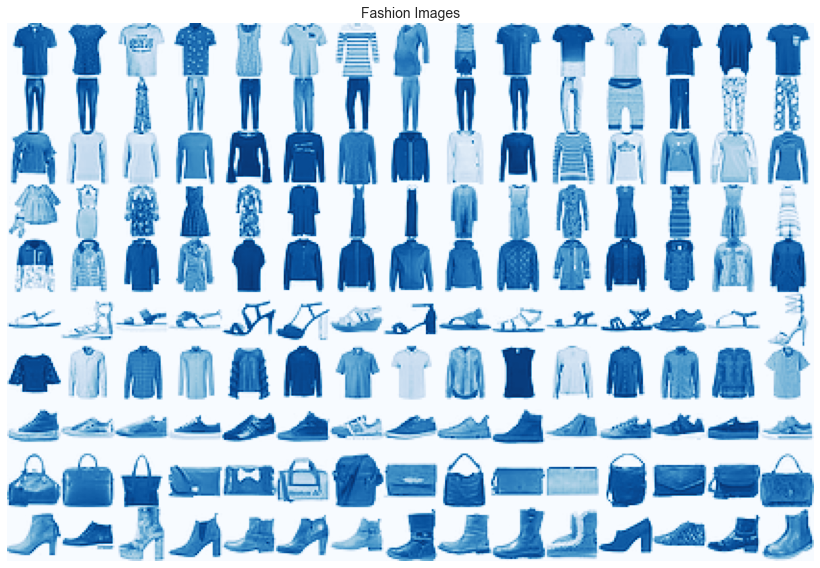

In [14]:
fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(fashion_label == label).squeeze()
    sample_indices = choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = fashion_data[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=14)
plt.axis('off')
fig.tight_layout()

### Visual Evidence for the Manifold Hypothesis: Pixel Structure of different image classes

We'll display 100 sample images in 'wide' format so we can compare patterns by class. It turns out that each of the ten classes is both homogenous while exhibiting significantly distinct pixel structure compared to the other nine classes. 

The white space shows that ther is no variation in many of the 784 dimensions, suggesting that each object is embedded in a lower-dimensional space.

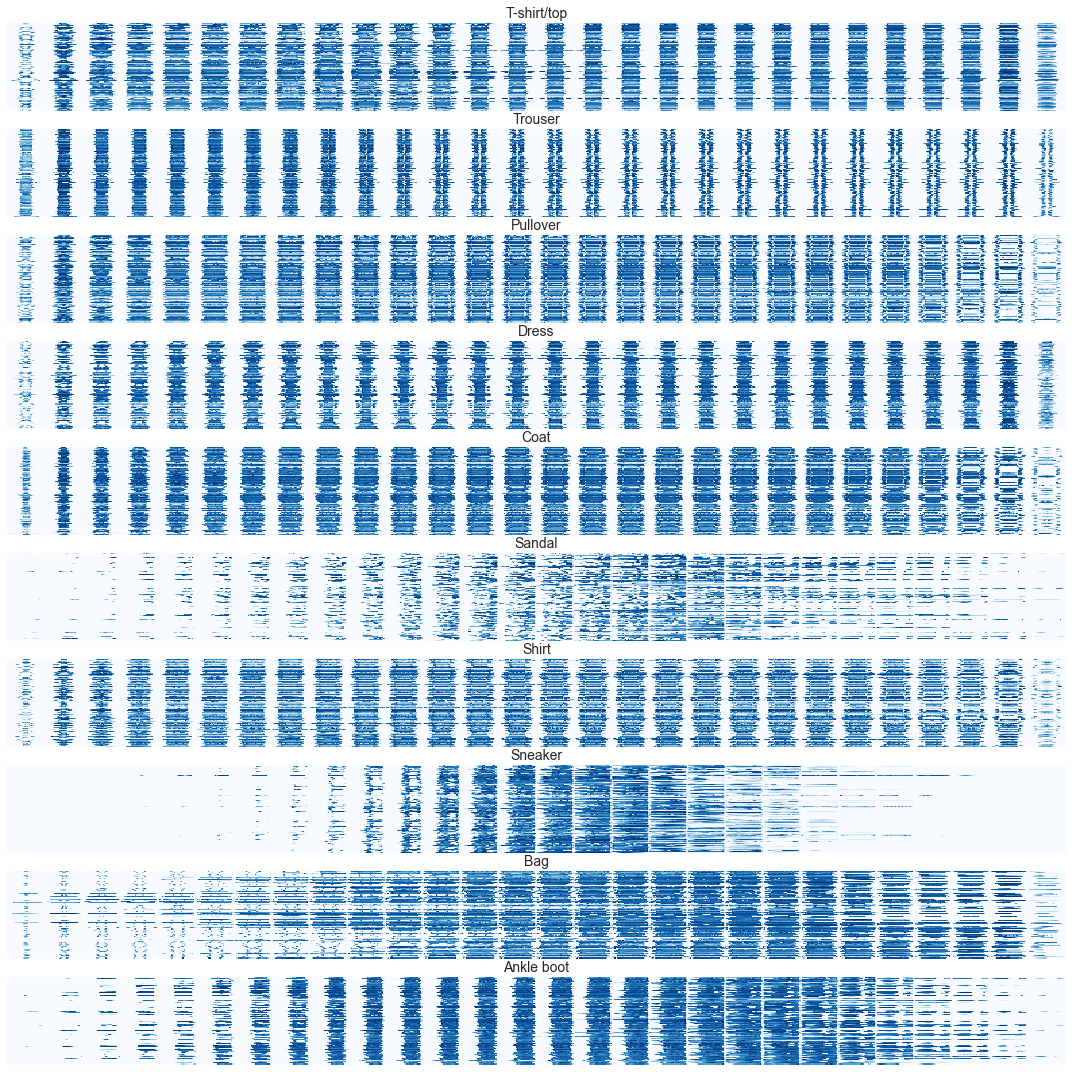

In [15]:
fig, axes = plt.subplots(nrows=len(classes), figsize=(15, 15))
n = 100
samples = []
for i, label in enumerate(classes):
    label_idx = np.argwhere(fashion_label == label).squeeze()
    samples = choice(label_idx, size=n, replace=False)
    sns.heatmap(fashion_data[samples], cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(label_dict[label], fontsize=14)
    axes[i].axis('off')
fig.tight_layout(h_pad=.1)

### Pixel structure of random images

The ten class patterns are clearly distinct from 100 random 'images'.

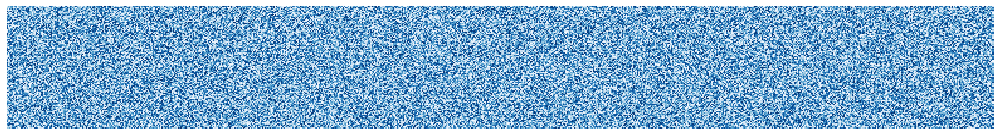

In [16]:
fig, ax = plt.subplots(figsize=(14, 2))
sns.heatmap(np.random.randint(low=0,
                              high=255,
                              size=(100, 784)),
            cmap='Blues', ax=ax, cbar=False)
plt.axis('off')
fig.tight_layout()